HOW THE MODEL WORKS.

    When you run the program it will ask you to insert some parameters:
    - The tag of the stock you want to analyse according to the yahoo finance tag.

    -The year from which you want to take the stock data. I suggest you not to take only rcent data or too old data. To make the
        model work in an efficiency way a year between 1990 and 2010 it will be ok. You can try different period of time to improve
        the efficiency of the model

    -How many days the model has to consider to make the prediction. Between 10 and 20 days it can be a good choice to give the model 
        a good amount of data in order not to make the program to slow.
        
    - How many days after today the model ha to predict the price. For example if you today is day x and you put 5 the model will predict
         the price at the date x+5. i suggest you not to predict too much in the future in order not to have a very low effciency of the model.
    
    In all of these parameters you can try different period of time to improve the efficiency of the model

    To make its predictions the model will study the price and the volume of the previous days.
    It will give you not just the prediction of the trend of the price (if the price will go up or down) but also the probability that its prediction is right.
    It will also give you some charts about the general trend of the price and the volume over the years.
        

In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import pandas_ta as ta
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

tag=input("Digit asset tag ").upper()
year=input("Digit starting year ")
today=datetime.date.today()
db=yf.download(tag,start=f"{year}-01-01", end=today)
print(db.shape)
print(db.head())

[*********************100%***********************]  1 of 1 completed
(2500, 6)
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  78.580002  78.930000  77.699997  78.449997  78.214508  18177500
2015-01-05  77.980003  79.250000  76.860001  77.190002  76.958290  26452200
2015-01-06  77.230003  77.589996  75.360001  76.150002  75.921410  27399300
2015-01-07  76.760002  77.360001  75.820000  76.150002  75.921410  22045300
2015-01-08  76.739998  78.230003  76.080002  78.180000  77.945320  23961000


In [512]:
db1=db[["Close","Volume"]]
def featureengineering(db1,giornodapredirre):
    ran=int(input("How many previous day the model has to consider? "))
    for i in range (1,ran+1):
        db1[f"Close {i}"]=db1["Close"].shift(i)
    for i in range (1,ran+1):
        db1[f"Volume {i}"]=db1["Volume"].shift(i)
    
    db1["giornodapredirre"]=db1["Close"].shift(-giornodapredirre)
    
    return db1


giornodapredirre=int(input("How many days the model has to predict? "))
db1=featureengineering(db1,giornodapredirre)
# il dbveritiero verrà usato più avanti per verificare l'efficacia del modello
db1.isnull().sum()
db1





,Close,Volume,Close 1,Close 2,Close 3,Close 4,Close 5,Close 6,Close 7,Close 8,...,Volume 12,Volume 13,Volume 14,Volume 15,Volume 16,Volume 17,Volume 18,Volume 19,Volume 20,giornodapredirre
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,78.449997,18177500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.150002
2015-01-05,77.190002,26452200,78.449997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.150002
2015-01-06,76.150002,27399300,77.190002,78.449997,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.180000
2015-01-07,76.150002,22045300,76.150002,77.190002,78.449997,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.739998
2015-01-08,78.180000,23961000,76.150002,76.150002,77.190002,78.449997,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.720001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-02,592.830017,12522400,574.320007,569.200012,573.539978,565.109985,559.140015,563.090027,565.520020,561.090027,...,10757600.0,16287700.0,10209100.0,9415700.0,14653700.0,18305400.0,9775400.0,12064600.0,15303200.0,613.780029
2024-12-03,613.650024,14907200,592.830017,574.320007,569.200012,573.539978,565.109985,559.140015,563.090027,565.520020,...,11053700.0,10757600.0,16287700.0,10209100.0,9415700.0,14653700.0,18305400.0,9775400.0,12064600.0,608.929993
2024-12-04,613.780029,14697000,613.650024,592.830017,574.320007,569.200012,573.539978,565.109985,559.140015,563.090027,...,17712900.0,11053700.0,10757600.0,16287700.0,10209100.0,9415700.0,14653700.0,18305400.0,9775400.0,623.770020


In [513]:
db1.tail()

,Close,Volume,Close 1,Close 2,Close 3,Close 4,Close 5,Close 6,Close 7,Close 8,...,Volume 12,Volume 13,Volume 14,Volume 15,Volume 16,Volume 17,Volume 18,Volume 19,Volume 20,giornodapredirre
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-02,592.830017,12522400,574.320007,569.200012,573.539978,565.109985,559.140015,563.090027,565.520020,561.090027,...,10757600.0,16287700.0,10209100.0,9415700.0,14653700.0,18305400.0,9775400.0,12064600.0,15303200.0,613.780029
2024-12-03,613.650024,14907200,592.830017,574.320007,569.200012,573.539978,565.109985,559.140015,563.090027,565.520020,...,11053700.0,10757600.0,16287700.0,10209100.0,9415700.0,14653700.0,18305400.0,9775400.0,12064600.0,608.929993
2024-12-04,613.780029,14697000,613.650024,592.830017,574.320007,569.200012,573.539978,565.109985,559.140015,563.090027,...,17712900.0,11053700.0,10757600.0,16287700.0,10209100.0,9415700.0,14653700.0,18305400.0,9775400.0,623.770020
2024-12-05,608.929993,8081200,613.780029,613.650024,592.830017,574.320007,569.200012,573.539978,565.109985,559.140015,...,14346700.0,17712900.0,11053700.0,10757600.0,16287700.0,10209100.0,9415700.0,14653700.0,18305400.0,NaN
2024-12-06,623.770020,16924300,608.929993,613.780029,613.650024,592.830017,574.320007,569.200012,573.539978,565.109985,...,9522400.0,14346700.0,17712900.0,11053700.0,10757600.0,16287700.0,10209100.0,9415700.0,14653700.0,NaN


(2500, 47)

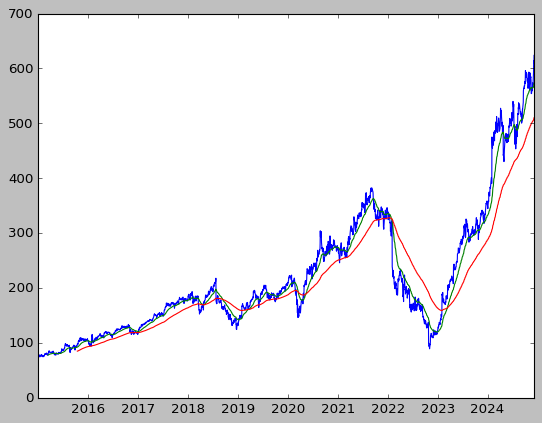

In [514]:
def graficoprezzo(db1):
    db1["ema1"]=ta.ema(db1["Close"],length=50)
    db1["ema2"]=ta.ema(db1["Close"],length=200)
    db1["ema3"]=ta.ema(db1["Close"],length=7)
    db1["ema4"]=ta.ema(db1["Close"],length=21)
    return db1
db1=graficoprezzo(db1)
dbveritiero=db1.copy()
db3=db1.copy()
# db1.dropna(inplace=True)
plt.style.use("classic")
plt.plot(db1.index,db1["Close"])
plt.plot(db1.index,db1["ema1"])
plt.plot(db1.index,db1["ema2"])
db1.shape

In [515]:
def creatingdb2(db):
    db2=db[["Open","Close","Volume"]].copy()
    db2["roc"]=(db2["Close"]-db2["Open"])/db2["Open"]*100
    db2["month"]=db2.index
    db2["month"]=db2["month"].dt.month
    db2["day"]=db2.index
    db2["day"]=db2["day"].dt.day
    return db2
db2=creatingdb2(db)
print(db2.tail())


                  Open       Close    Volume       roc  month  day
Date                                                              
2024-12-02  577.500000  592.830017  12522400  2.654548     12    2
2024-12-03  595.000000  613.650024  14907200  3.134458     12    3
2024-12-04  612.960022  613.780029  14697000  0.133778     12    4
2024-12-05  617.080017  608.929993   8081200 -1.320740     12    5
2024-12-06  610.099976  623.770020  16924300  2.240624     12    6


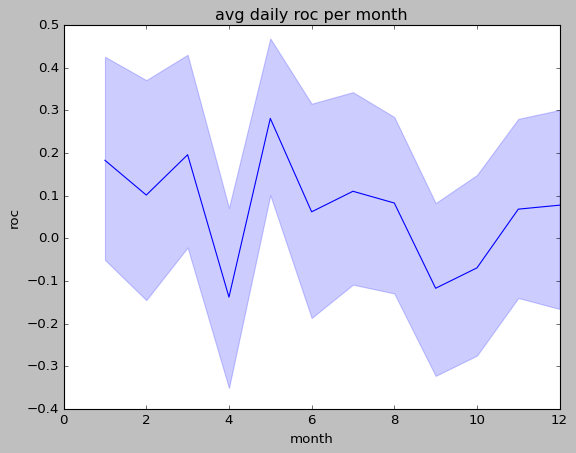

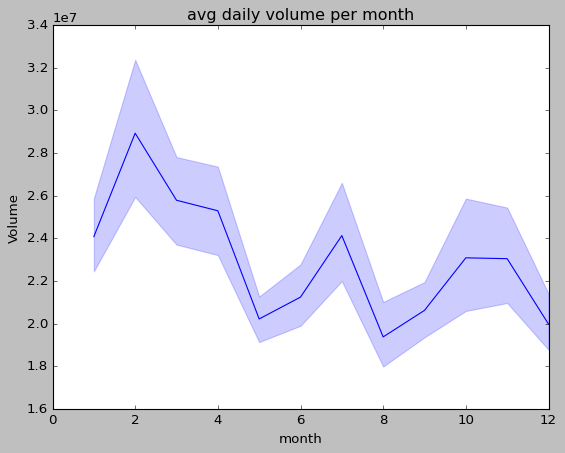

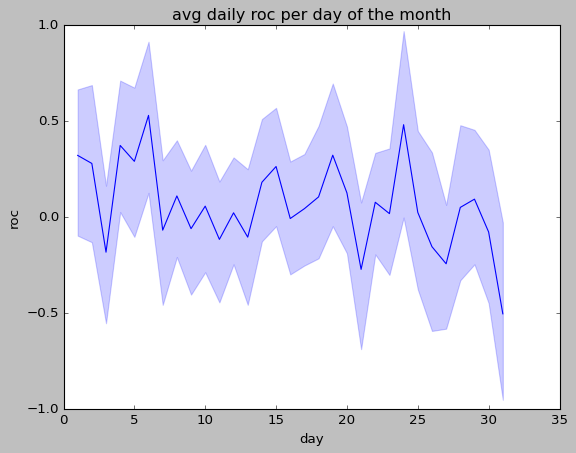

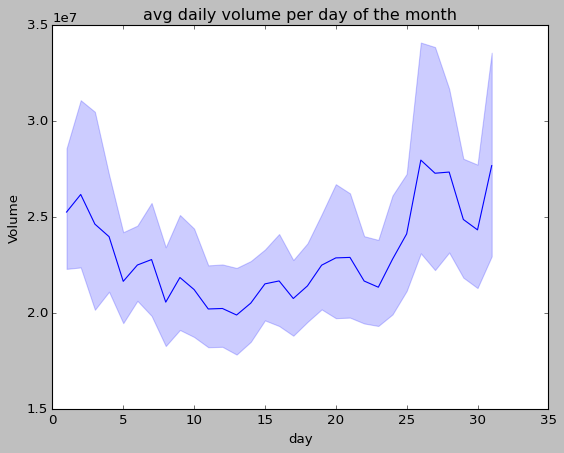

In [516]:
def rappresentazionegrafici(db2):
    sns.lineplot(data=db2,x="month",y="roc")
    plt.title("avg daily roc per month")
    plt.show()
    sns.lineplot(data=db2,x="month",y="Volume")
    plt.title("avg daily volume per month")
    plt.show()
    sns.lineplot(data=db2,x="day",y="roc")
    plt.title("avg daily roc per day of the month")
    plt.show()
    sns.lineplot(data=db2,x="day",y="Volume")
    plt.title("avg daily volume per day of the month")
    plt.show()
rappresentazionegrafici(db2)

<Axes: >

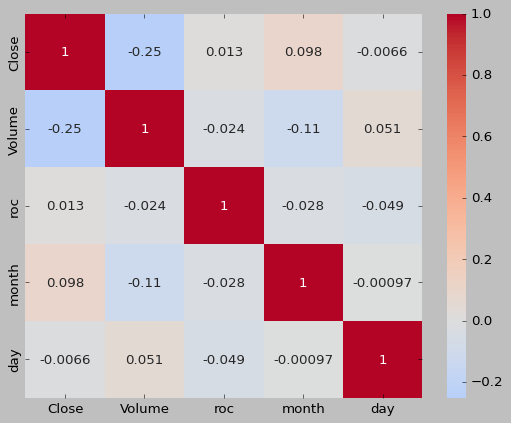

In [517]:
#mappa di correlazione

cor=db2.drop(columns=["Open"]).corr()
sns.heatmap(cor, annot=True,center=0,cmap="coolwarm")

In [518]:
# Droppo i nulli perchè alcuni modelli non permettono la presenza di valori nulli
print(db1.shape)
db1=db1.dropna()
print(db1.tail())

(2500, 47)
                 Close    Volume     Close 1     Close 2     Close 3  \
Date                                                                   
2024-11-27  569.200012   7200200  573.539978  565.109985  559.140015   
2024-11-29  574.320007   7130500  569.200012  573.539978  565.109985   
2024-12-02  592.830017  12522400  574.320007  569.200012  573.539978   
2024-12-03  613.650024  14907200  592.830017  574.320007  569.200012   
2024-12-04  613.780029  14697000  613.650024  592.830017  574.320007   

               Close 4     Close 5     Close 6     Close 7     Close 8  ...  \
Date                                                                    ...   
2024-11-27  563.090027  565.520020  561.090027  554.400024  554.080017  ...   
2024-11-29  559.140015  563.090027  565.520020  561.090027  554.400024  ...   
2024-12-02  565.109985  559.140015  563.090027  565.520020  561.090027  ...   
2024-12-03  573.539978  565.109985  559.140015  563.090027  565.520020  ...   
2024-12-04

In [519]:
print(db1.columns)

Index(['Close', 'Volume', 'Close 1', 'Close 2', 'Close 3', 'Close 4',
       'Close 5', 'Close 6', 'Close 7', 'Close 8', 'Close 9', 'Close 10',
       'Close 11', 'Close 12', 'Close 13', 'Close 14', 'Close 15', 'Close 16',
       'Close 17', 'Close 18', 'Close 19', 'Close 20', 'Volume 1', 'Volume 2',
       'Volume 3', 'Volume 4', 'Volume 5', 'Volume 6', 'Volume 7', 'Volume 8',
       'Volume 9', 'Volume 10', 'Volume 11', 'Volume 12', 'Volume 13',
       'Volume 14', 'Volume 15', 'Volume 16', 'Volume 17', 'Volume 18',
       'Volume 19', 'Volume 20', 'giornodapredirre', 'ema1', 'ema2', 'ema3',
       'ema4'],
      dtype='object')


In [520]:
#scaling data

from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
db1=db1.astype(float)
colonneprezzo=[]
colonnevolume=[]
for x in db1.columns:
    if x.startswith("Close") or x.startswith("ema"):
        colonneprezzo.append(x)
    elif x.startswith("Volume"):
        colonnevolume.append(x)



colonneprezzo=db1[colonneprezzo]
colonnevolume=db1[colonnevolume]

print(colonneprezzo.columns, colonnevolume.columns)

colonneprezzo=colonneprezzo.values.reshape(-1,colonneprezzo.shape[1])
colonnevolume=colonnevolume.values.reshape(-1,colonnevolume.shape[1])
colonnatarget=db1["giornodapredirre"].values.reshape(-1,1)
print(colonneprezzo.shape)
print(colonnevolume.shape)




Index(['Close', 'Close 1', 'Close 2', 'Close 3', 'Close 4', 'Close 5',
       'Close 6', 'Close 7', 'Close 8', 'Close 9', 'Close 10', 'Close 11',
       'Close 12', 'Close 13', 'Close 14', 'Close 15', 'Close 16', 'Close 17',
       'Close 18', 'Close 19', 'Close 20', 'ema1', 'ema2', 'ema3', 'ema4'],
      dtype='object') Index(['Volume', 'Volume 1', 'Volume 2', 'Volume 3', 'Volume 4', 'Volume 5',
       'Volume 6', 'Volume 7', 'Volume 8', 'Volume 9', 'Volume 10',
       'Volume 11', 'Volume 12', 'Volume 13', 'Volume 14', 'Volume 15',
       'Volume 16', 'Volume 17', 'Volume 18', 'Volume 19', 'Volume 20'],
      dtype='object')
(2299, 25)
(2299, 21)


In [521]:
# divisione in train,test

xpre=colonneprezzo
xvol=colonnevolume
y=colonnatarget
print(len(xvol))
print(len(xpre))
split=int(0.8*len(xvol))

xtrainvol,xtestvol=xvol[:split],xvol[split:]
xtrainpre,xtestpre=xpre[:split],xpre[split:]


ytrain,ytest=y[:split],y[split:]
print(xtrainpre.shape,xtrainvol.shape)

2299
2299
(1839, 25) (1839, 21)


In [522]:
# Scalatura

scalerPrezzo=MinMaxScaler()
scalerVolume=MinMaxScaler()
scalertarget=MinMaxScaler()

xtrainvol=scalerVolume.fit_transform(xtrainvol)
xtrainpre=scalerPrezzo.fit_transform(xtrainpre)
ytrain=scalertarget.fit_transform(ytrain)

xtestvol=scalerVolume.transform(xtestvol)
xtestpre=scalerPrezzo.transform(xtestpre)
ytest=scalertarget.transform(ytest)

xtrain=np.concatenate((xtrainpre,xtrainvol),axis=1)
xtest=np.concatenate((xtestpre,xtestvol),axis=1)
print(xtrain.shape, xtest.shape)





# colonneprezzo=scalernontarget.fit_transform(colonnenontarget)
# colonnatargettrain=scalertarget.fit_transform(ytrain)

(1839, 46) (460, 46)


In [523]:


linearmodel=LinearRegression()
modelgbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,random_state=0)
modelsvr=SVR(kernel="linear")

print(ytrain)


[[0.02758549]
 [0.02796057]
 [0.03668972]
 ...
 [0.3312647 ]
 [0.35022333]
 [0.32229683]]


0.9902218548737934
0.030196495708271157


Text(0.5, 1.0, 'prediction with linear model')

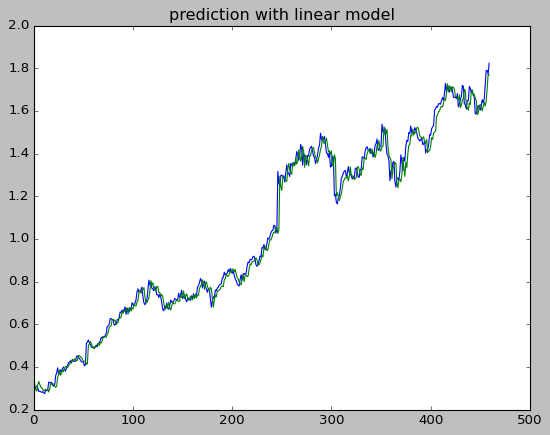

In [524]:
# Linear regression model
linearmodel.fit(xtrain,ytrain)
linearpredictions=linearmodel.predict(xtest)
print(r2_score(ytest,linearpredictions))
print(mean_absolute_error(ytest,linearpredictions))
plt.plot(ytest)
plt.plot(linearpredictions)
plt.title("prediction with linear model")

0.26075349836910305


Text(0.5, 1.0, 'prediction with gbr model')

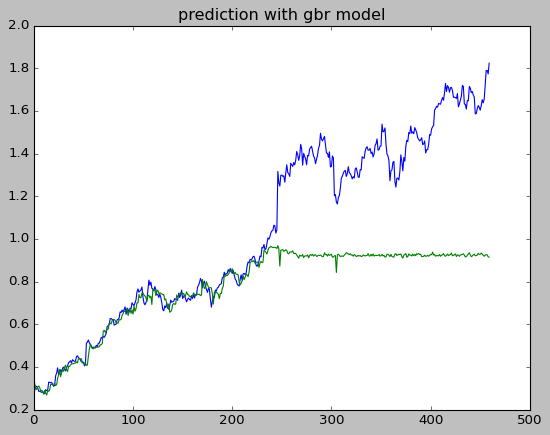

In [525]:
#GBR model

# grid = {
#     'n_estimators': [50, 100, 200],  # Numero di alberi nell'ensemble
#     'learning_rate': [0.01, 0.1, 0.2],  # Tasso di apprendimento
#     'max_depth': [3, 4, 5]  # Massima profondità degli alberi
    
# }

# search=GridSearchCV(estimator=modelgbr,param_grid=grid,cv=5)
# search.fit(xtrain,ytrain)
# bestmodel=search.best_estimator_
# bestmodel.fit(xtrain,ytrain)
modelgbr.fit(xtrain,ytrain)
predictionsgbr=modelgbr.predict(xtest)
print(mean_absolute_error(ytest,predictionsgbr))
plt.plot(ytest)
plt.plot(predictionsgbr)
plt.title("prediction with gbr model")

In [526]:
# model SVR

# gridsvr = {
#     'kernel': ['linear', 'rbf', 'poly'],  # Funzione kernel
#     'C': [0.1, 1, 10],  # Parametro di regolarizzazione
#     'epsilon': [0.01, 0.1, 0.2],  # Tolleranza
#     'gamma': ['scale', 'auto']  # Coefficiente gamma (solo per kernel 'rbf' e 'poly')
# }
# searchsvr=GridSearchCV(estimator=modelsvr, param_grid=gridsvr, cv=5)
# searchsvr.fit(xtrain,ytrain)
# bestmodelsvr=searchsvr.best_estimator_
# predictionssvr=bestmodelsvr.predict(xtest)
# print(r2_score(ytest,predictionssvr))
# print(mean_absolute_error(ytest,predictionssvr))
# plt.plot(ytest)
# plt.plot(predictionssvr)
# plt.title("prediction with SVR model")

In [527]:
# rete neurale con lstm

import torch
import torch.nn as nn

xtraint=torch.from_numpy(xtrain.astype(np.float32)).view(xtrain.shape[0],xtrain.shape[1])
ytraint=torch.from_numpy(ytrain.astype(np.float32)).view(ytrain.shape[0], 1)
xtestt=torch.from_numpy(xtest.astype(np.float32)).view(xtest.shape[0], xtrain.shape[1])


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet,self).__init__()
        self.l1=nn.LSTM(input_size, hidden_size, batch_first=False)
        self.l3=nn.Linear( hidden_size, hidden_size)
        self.l2=nn.Linear(hidden_size, 1)
        
    def forward(self,x):
        out,_= self.l1(x)                                                 
        # out= self.l3(out)
        # out=out[:,-1]
        
        out=self.l2(out)
        return out
    
model3=NeuralNet(xtrain.shape[1],1)
criterion=nn.L1Loss()
optimizer=torch.optim.Adam(model3.parameters(),lr=0.01)


for epoch in range(1000):
    pred=model3(xtraint)
    loss=criterion(pred,ytraint)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1)%1000==0:
        print(f"epoch :{epoch+1}, loss={loss.item()}")



predictionslstm=model3(xtestt)
predictionslstm=predictionslstm.detach().numpy()


epoch :1000, loss=0.016398048028349876


Text(0.5, 1.0, 'lstm model')

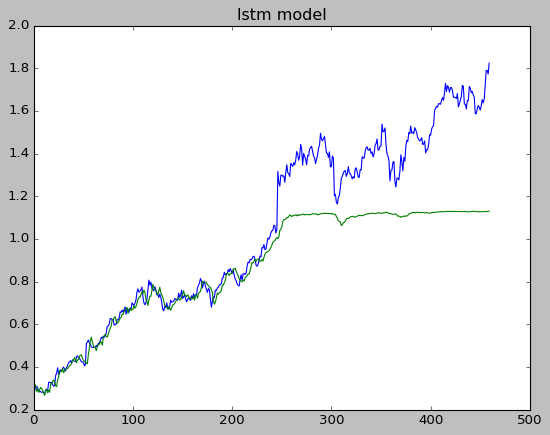

In [528]:

plt.plot(ytest)
plt.plot(predictionslstm)
plt.title("lstm model")

In [529]:
# applico il modello al db con ancora i dati dell'ultimo giorno 
# di mercato perchè nel db1 era stata droppata per il shift per creare la colonna del prezzo del giorno successivo.
# db3 è una copia di db1 senza aver droppato i nulli.

db3x=db3.drop(columns=["giornodapredirre"])
db3x.dropna(inplace=True)
print(db3x.shape)
# Divido le colonne del nuovo dataset in base al fatto che siano quelle con il prezzo o quelle con il volume
# in modo da scalarle con il proprio scalatore
colonneprezzo=[]
colonnevolume=[]
for x in db3x.columns:
    if x.startswith("Close") or x.startswith("ema"):
        colonneprezzo.append(x)
    elif x.startswith("Volume"):
        colonnevolume.append(x)

xnuovaclose=db3x[colonneprezzo]
xnuovavol=db3x[colonnevolume]
xnuovaclose=xnuovaclose.values.reshape(-1,xnuovaclose.shape[1])
xnuovavol=xnuovavol.values.reshape(-1,xnuovavol.shape[1])

xnuovaclose=scalerPrezzo.transform(xnuovaclose)
xnuovavol=scalerVolume.transform(xnuovavol)
print(xnuovaclose.shape,xnuovavol.shape)
xnuovaclose=xnuovaclose[split:]
xnuovavol=xnuovavol[split:]
xnuova=np.concatenate((xnuovaclose,xnuovavol),axis=1)

print(xnuova.shape)

# predictionsnuove=linearmodel.predict(xnuova)

(2301, 46)
(2301, 25) (2301, 21)
(462, 46)


In [530]:
# previsione con modello lineare

oggi=xnuova[-1].reshape(-1,db3.shape[1]-1)
previsionerichiesta=linearmodel.predict(oggi)
ultimachiusura=(db3["Close"].tail(1).reset_index())["Close"]
previsionerichiesta=previsionerichiesta.reshape(1,1)
previsionerichiesta=scalertarget.inverse_transform(previsionerichiesta).reshape(-1)
print(f"The price at the selected day is {round(float(previsionerichiesta),3)}")
print(f"At the last day the price is {round(float(ultimachiusura),3)}")
print(f"According to the Linear model at the date {today + datetime.timedelta(days=giornodapredirre)} will change of {round((float(previsionerichiesta)-float(ultimachiusura))/float(ultimachiusura)*100,3)}% compared to today price")

The price at the selected day is 618.826
At the last day the price is 623.77
According to the Linear model at the date 2024-12-09 will change of -0.793% compared to today price


In [531]:
# Previsioni con modello GBR

oggi=xnuova[-1].reshape(-1,db3.shape[1]-1)
previsionerichiestagbr=modelgbr.predict(oggi)
# ultimachiusura=(db3["Close"].tail(1).reset_index())["Close"]
previsionerichiestagbr=previsionerichiestagbr.reshape(1,1)
previsionerichiestagbr=scalertarget.inverse_transform(previsionerichiestagbr).reshape(-1)
print(f"The price at the selected day is {round(float(previsionerichiestagbr),3)}")
print(f"At the last day the price is {round(float(ultimachiusura),3)}")
print(f"According to the GBR model at the date {today + datetime.timedelta(days=giornodapredirre)} will change of {round((float(previsionerichiestagbr)-float(ultimachiusura))/float(ultimachiusura)*100,3)}% compared to today price")

The price at the selected day is 359.079
At the last day the price is 623.77
According to the GBR model at the date 2024-12-09 will change of -42.434% compared to today price


In [532]:
# previsione con modello SVR


# previsionesvrnuova=bestmodelsvr.predict(oggi)
# ultimachiusura=(db3["Close"].tail(1).reset_index())["Close"]
# previsionesvrnuova=previsionesvrnuova.reshape(1,1)
# previsionesvrnuova=scalertarget.inverse_transform(previsionesvrnuova).reshape(-1)
# print(f"il prezzo al giorno richiesto è {round(float(previsionesvrnuova),3)}")
# print(f"l'ultima chiusura è {round(float(ultimachiusura),3)}")
# print(f"secondo il modello SVR rispetto all'ultima chiusura il prezzo alla data {today + datetime.timedelta(days=giornodapredirre)} varierà di {round((float(previsionesvrnuova)-float(ultimachiusura))/float(ultimachiusura)*100,3)} %")

In [533]:
# previsione con modello lstm

oggit=torch.from_numpy(oggi.astype(np.float32)).view(oggi.shape[0],oggi.shape[1])
predlstmnuove=model3(oggit).detach().numpy()
predlstmnuove=scalertarget.inverse_transform(predlstmnuove)
print(f"The price at the selected day is {round(float(predlstmnuove),3)}")
print(f"At the last day the price is {round(float(ultimachiusura),3)}")
print(f"According to the LSTM model at the date {today + datetime.timedelta(days=giornodapredirre)} will change of {round((float(predlstmnuove)-float(ultimachiusura))/float(ultimachiusura)*100,3)}% compared to today price")


The price at the selected day is 313.607
At the last day the price is 623.77
According to the LSTM model at the date 2024-12-09 will change of -49.724% compared to today price


In [534]:
# valutazione modello se sale o scende
# L'ultimo giorno del xtest è il giorno attuale meno i giorni che si predicono.
# non serve però avere il giorno attuale perchè si va solo a verificare la precisione del modello nel tempo

dbveritiero.dropna(inplace=True)
dbveritiero=dbveritiero[["Close","giornodapredirre"]]

dbveritiero.columns=["xtest","ytest"]



dbveritiero.insert(1,"sale",[1 if x>y else 0 for x,y in zip(dbveritiero["ytest"],dbveritiero["xtest"])])
print(dbveritiero.tail(10))

                 xtest  sale       ytest
Date                                    
2024-11-20  565.520020     0  559.140015
2024-11-21  563.090027     1  565.109985
2024-11-22  559.140015     1  573.539978
2024-11-25  565.109985     1  569.200012
2024-11-26  573.539978     1  574.320007
2024-11-27  569.200012     1  592.830017
2024-11-29  574.320007     1  613.650024
2024-12-02  592.830017     1  613.780029
2024-12-03  613.650024     0  608.929993
2024-12-04  613.780029     1  623.770020


In [535]:
# quante volte il modello indovina se il prezzo sale o scende con modello lineare
predictionsinverse=(scalertarget.inverse_transform(linearpredictions)).flatten()
dbveritiero=dbveritiero[split:].reset_index()
print(predictionsinverse.shape)
print(dbveritiero.shape)
dbdaunire=pd.Series(predictionsinverse)
# dbveritiero=pd.concat([dbveritiero,dbdaunire],axis=1)
print(dbveritiero)

# dbprevisioni=pd.DataFrame({"xtest":xtest,"previsioni":predictionsinverse})
# dbprevisioni.insert(1,"sale",[1 if x>y else 0 for x,y in zip(dbprevisioni["previsioni"],dbprevisioni["xtest"])])
# print(dbprevisioni.shape)
# print(dbprevisioni.tail(10))

(460,)
(460, 4)
          Date       xtest  sale       ytest
0   2023-02-07  191.619995     0  177.919998
1   2023-02-08  183.429993     0  174.149994
2   2023-02-09  177.919998     1  179.429993
3   2023-02-10  174.149994     1  179.479996
4   2023-02-13  179.429993     0  177.160004
..         ...         ...   ...         ...
455 2024-11-27  569.200012     1  592.830017
456 2024-11-29  574.320007     1  613.650024
457 2024-12-02  592.830017     1  613.780029
458 2024-12-03  613.650024     0  608.929993
459 2024-12-04  613.780029     1  623.770020

[460 rows x 4 columns]


In [536]:
dbdaunire=pd.DataFrame({"prev":dbdaunire})
dbveritierolinear=pd.concat([dbveritiero,dbdaunire],axis=1)

print(dbveritiero.shape)

(460, 4)


In [537]:

dbveritierolinear.insert(5,"sale_prev",[1 if x>y else 0 for x,y in zip(dbveritierolinear["prev"],dbveritierolinear["xtest"])])
print(dbveritierolinear.tail(10))

          Date       xtest  sale       ytest        prev  sale_prev
450 2024-11-20  565.520020     0  559.140015  567.095921          1
451 2024-11-21  563.090027     1  565.109985  563.952528          1
452 2024-11-22  559.140015     1  573.539978  557.903908          0
453 2024-11-25  565.109985     1  569.200012  564.096589          0
454 2024-11-26  573.539978     1  574.320007  570.522128          0
455 2024-11-27  569.200012     1  592.830017  564.604049          0
456 2024-11-29  574.320007     1  613.650024  571.272106          0
457 2024-12-02  592.830017     1  613.780029  588.898694          0
458 2024-12-03  613.650024     0  608.929993  608.729754          0
459 2024-12-04  613.780029     1  623.770020  607.515533          0


In [538]:


from sklearn.metrics import confusion_matrix, precision_score


# print(dbprevisioni)
cf=confusion_matrix(dbveritierolinear["sale"],dbveritierolinear["sale_prev"])
print(cf)
precisionemodellolineare=round((cf[0,0]+cf[1,1])/np.sum(cf)*100,2)
print(f"The linear regression model has a precision of {round(precisionemodellolineare,2)}% in the predicting if the price will go up or down.")
dbmediarocnelperiodo=db3[["Close","giornodapredirre"]]
dbmediarocnelperiodo.dropna(inplace=True)
# Valuto il roc medio che si è effettivamente verificato nel periodo per valutare se il modello è affidabile
dbmediarocnelperiodo["rocnelperiodo"]=(dbmediarocnelperiodo["giornodapredirre"]-dbmediarocnelperiodo["Close"])/dbmediarocnelperiodo["Close"]*100
dbrocsale=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]>0]
dbrocscende=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]<0]
possibilitaveritieradisalire=dbrocsale.shape[0]/dbmediarocnelperiodo.shape[0]*100

precisionequandosalelineare=round(cf[1,1]/(cf[1,1]+cf[0,1])*100,2)
precisionequandoscendelineare=round(cf[0,0]/(cf[0,0]+cf[1,0])*100,2)

print(f"When the model predict the price will go up it is right the {precisionequandosalelineare}% of the times")
print(f"When the model predict the price will go down it is right the {precisionequandoscendelineare}% of the times")
print(f"The close price at the selected day is {round(float(previsionerichiesta),3)}")
print(f"At the last closing day the price is {round(float(ultimachiusura),3)}")
print(f"According to the Linear model at the date {today + datetime.timedelta(days=giornodapredirre)} the price will change of {round((float(previsionerichiesta)-float(ultimachiusura))/float(ultimachiusura)*100,3)}% compared to today's price")
print(f"In the selected period, the price at the distance of {giornodapredirre} days had the probability of {possibilitaveritieradisalire} % of going up")





[[113  76]
 [163 108]]
The linear regression model has a precision of 48.04% in the predicting if the price will go up or down.
When the model predict the price will go up it is right the 58.7% of the times
When the model predict the price will go down it is right the 40.94% of the times
The close price at the selected day is 618.826
At the last closing day the price is 623.77
According to the Linear model at the date 2024-12-09 the price will change of -0.793% compared to today's price
In the selected period, the price at the distance of 2 days had the probability of 54.4035228182546 % of going up


In [539]:
# Di quanto sale o scende in media il modello nel periodo di tempo?

# dbmediarocnelperiodo=db3[["Close","giornodapredirre"]]
# dbmediarocnelperiodo.dropna(inplace=True)
# dbmediarocnelperiodo["rocnelperiodo"]=(dbmediarocnelperiodo["giornodapredirre"]-dbmediarocnelperiodo["Close"])/dbmediarocnelperiodo["Close"]*100
# dbrocsale=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]>0]
# dbrocscende=dbmediarocnelperiodo[dbmediarocnelperiodo["rocnelperiodo"]<0]
# print(f"Il prezzo di {tag} nella realtà nel periodo di tempo indicato è salito {dbrocsale.shape[0]} volte cioè il {round(dbrocsale.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% delle volte")
# print(f"Il prezzo di {tag} nella realtà nel periodo di tempo indicato è sceso {dbrocscende.shape[0]} volte cioè il {round(dbrocscende.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% delle volte")
# print(f"Quando il prezzo sale in media nel periodo considerato sale in media del {round(dbrocsale['rocnelperiodo'].mean(),2)}%")
# print(f"Quando il prezzo scende in media nel periodo considerato scende in media del {round(dbrocscende['rocnelperiodo'].mean(),2)}%")


In [540]:
# print(cf)
# print(f"Quando il modello prevede che il prezzo sale ha una probbilità del {round(cf[1,1]/(cf[1,1]+cf[0,1])*100,2)}% di avere ragione")
# print(f"Quando il modello prevede che il prezzo scende ha una probbilità del {round(cf[0,0]/(cf[0,0]+cf[1,0])*100,2)}% di avere ragione")

In [541]:
# MODEL GBR

predictionsinverse=(scalertarget.inverse_transform(predictionsgbr.reshape(-1,1))).flatten()
print(predictionsinverse.shape)
print(dbveritiero.shape)
dbdaunire=pd.Series(predictionsinverse)
dbveritierogbr=dbveritiero.copy()
dbveritierogbr.insert(4,"prevgbr",dbdaunire)
print(dbveritierogbr.tail(10))
dbveritierogbr.insert(5,"sale_prev",[1 if x>y else 0 for x,y in zip(dbveritierogbr["prevgbr"],dbveritierogbr["xtest"])])

(460,)
(460, 4)
          Date       xtest  sale       ytest     prevgbr
450 2024-11-20  565.520020     0  559.140015  361.206240
451 2024-11-21  563.090027     1  565.109985  362.665794
452 2024-11-22  559.140015     1  573.539978  361.275692
453 2024-11-25  565.109985     1  569.200012  359.750857
454 2024-11-26  573.539978     1  574.320007  358.262016
455 2024-11-27  569.200012     1  592.830017  359.888100
456 2024-11-29  574.320007     1  613.650024  360.543347
457 2024-12-02  592.830017     1  613.780029  360.261315
458 2024-12-03  613.650024     0  608.929993  357.619106
459 2024-12-04  613.780029     1  623.770020  356.971697


In [542]:

cf=confusion_matrix(dbveritierogbr["sale"],dbveritierogbr["sale_prev"])
print(cf)
precisionemodellogbr=round((cf[0,0]+cf[1,1])/np.sum(cf),2)*100
print(f"The GBR model has a precision of {precisionemodellogbr}% in predicting if the price will go up or down in the selected period of time.")

precisionequandosaleGBR=round(cf[1,1]/(cf[1,1]+cf[0,1])*100,2)
precisionequandoscendeGBR=round(cf[0,0]/(cf[0,0]+cf[1,0])*100,2)
print(f"When the model predict the price will go up it is right the {precisionequandosaleGBR}% of the times")
print(f"When the model predict the price will go down it is right the {precisionequandoscendeGBR}% of the times")
print(f"The close price at the selected day is {round(float(previsionerichiestagbr),3)}")
print(f"At the last closing day the price is {round(float(ultimachiusura),3)}")
print(f"According to the GBR model at the date {today + datetime.timedelta(days=giornodapredirre)} the price will change of {round((float(previsionerichiestagbr)-float(ultimachiusura))/float(ultimachiusura)*100,3)}% compared to today's price")
print(f"In the selected period, the price at the distance of {giornodapredirre} days had the probability of {possibilitaveritieradisalire} % of going up")

[[158  31]
 [209  62]]
The GBR model has a precision of 48.0% in predicting if the price will go up or down in the selected period of time.
When the model predict the price will go up it is right the 66.67% of the times
When the model predict the price will go down it is right the 43.05% of the times
The close price at the selected day is 359.079
At the last closing day the price is 623.77
According to the GBR model at the date 2024-12-09 the price will change of -42.434% compared to today's price
In the selected period, the price at the distance of 2 days had the probability of 54.4035228182546 % of going up


In [543]:
# Model LSTM

predictionsinverse=(scalertarget.inverse_transform(predictionslstm.reshape(-1,1))).flatten()
dbdaunire=pd.Series(predictionsinverse)
dbveritierolstm=dbveritiero.copy()
dbveritierolstm.insert(4,"prevlstm",dbdaunire)

dbveritierolstm.insert(5,"sale_prev",[1 if x>y else 0 for x,y in zip(dbveritierolstm["prevlstm"],dbveritierolstm["xtest"])])
print(dbveritierolstm.tail(10))


          Date       xtest  sale       ytest    prevlstm  sale_prev
450 2024-11-20  565.520020     0  559.140015  419.540955          0
451 2024-11-21  563.090027     1  565.109985  419.612122          0
452 2024-11-22  559.140015     1  573.539978  419.498840          0
453 2024-11-25  565.109985     1  569.200012  419.523468          0
454 2024-11-26  573.539978     1  574.320007  419.682922          0
455 2024-11-27  569.200012     1  592.830017  419.854919          0
456 2024-11-29  574.320007     1  613.650024  419.650330          0
457 2024-12-02  592.830017     1  613.780029  419.860596          0
458 2024-12-03  613.650024     0  608.929993  420.058502          0
459 2024-12-04  613.780029     1  623.770020  420.307892          0


In [544]:


# print(dbprevisioni)
cf=confusion_matrix(dbveritierolstm["sale"],dbveritierolstm["sale_prev"])
print(cf)
precisionemodellolstm=round((cf[0,0]+cf[1,1])/np.sum(cf),2)*100
print(f"The LSTM model has a precision of {precisionemodellolstm}% in predicting if the price will go up or down.")


precisionequandosaleLSTM=round(cf[1,1]/(cf[1,1]+cf[0,1])*100,2)
precisionequandoscendeLSTM=round(cf[0,0]/(cf[0,0]+cf[1,0])*100,2)
print(f"When the model predict the price will go up it is right the {precisionequandosaleLSTM}% of the times")
print(f"When the model predict the price will go down it is right the {precisionequandoscendeLSTM}% of the times")
print(f"The close price at the selected day is {round(float(predlstmnuove),3)}")
print(f"At the last closing day the price is {round(float(ultimachiusura),3)}")
print(f"According to the LSTM model at the date {today + datetime.timedelta(days=giornodapredirre)} the price will change of {round((float(predlstmnuove)-float(ultimachiusura))/float(ultimachiusura)*100,3)}% compred to today's price.")
print(f"In the selected period, the price at the distance of {giornodapredirre} days had the probability of {possibilitaveritieradisalire} % of going up")

[[148  41]
 [207  64]]
The LSTM model has a precision of 46.0% in predicting if the price will go up or down.
When the model predict the price will go up it is right the 60.95% of the times
When the model predict the price will go down it is right the 41.69% of the times
The close price at the selected day is 313.607
At the last closing day the price is 623.77
According to the LSTM model at the date 2024-12-09 the price will change of -49.724% compred to today's price.
In the selected period, the price at the distance of 2 days had the probability of 54.4035228182546 % of going up


In [545]:
print(f"The selected period to predict is {giornodapredirre} days")

# quale è il modello con più precisione in assoluto

modellopiùpreciso=max(precisionemodellolineare,precisionemodellolstm,precisionemodellogbr)
if modellopiùpreciso==precisionemodellolineare:
    print(f"The most precise is the linear model: {precisionemodellolineare}")
elif modellopiùpreciso==precisionemodellolstm:
    print(f"The most precise is the LSTM model: {precisionemodellolstm}")
elif modellopiùpreciso==precisionemodellogbr:
    print(f"The most precise is the GBR model: {precisionemodellogbr}")
modellomenopreciso=min(precisionemodellolineare,precisionemodellolstm,precisionemodellogbr)
if modellomenopreciso==precisionemodellolineare:
    print(f"The less precise is the linear model: {precisionemodellolineare}")
elif modellomenopreciso==precisionemodellolstm:
    print(f"The less precise is the LSTM model: {precisionemodellolstm}")
elif modellomenopreciso==precisionemodellogbr:
    print(f"The less precise is the GBR model: {precisionemodellogbr}")


# quale è il modello che prevede meglio quando il prezzo sale

modellopiùprecisoquandosale=max(precisionequandosaleLSTM,precisionequandosaleGBR,precisionequandosalelineare)
if modellopiùprecisoquandosale==precisionequandosalelineare:
    print(f"When it predicts the price will go up the most precise model is the linear model: {precisionequandosalelineare}")
elif modellopiùprecisoquandosale==precisionequandosaleLSTM:
    print(f"When it predicts the price will go up the most precise model is the LSTM model: {precisionequandosaleLSTM}")
elif modellopiùprecisoquandosale==precisionequandosaleGBR:
    print(f"When it predicts the price will go up the most precise model is the GBR model: {precisionequandosaleGBR}")

# quale è il modello che prevede meglio quando il prezzo scende

modellopiùprecisoquandoscende=max(precisionequandoscendeLSTM,precisionequandoscendeGBR,precisionequandoscendelineare)
if modellopiùprecisoquandoscende==precisionequandoscendelineare:
    print(f"When it predicts the price will go down the most precise model is the linear model: {precisionequandoscendelineare}")
elif modellopiùprecisoquandoscende==precisionequandoscendeLSTM:
    print(f"When it predicts the price will go down the most precise model is the LSTM model: {precisionequandoscendeLSTM}")
elif modellopiùprecisoquandoscende==precisionequandoscendeGBR:
    print(f"When it predicts the price will go down the most precise model is the GBR model: {precisionequandoscendeGBR}")




The selected period to predict is 2 days
The most precise is the linear model: 48.04
The less precise is the LSTM model: 46.0
When it predicts the price will go up the most precise model is the GBR model: 66.67
When it predicts the price will go down the most precise model is the GBR model: 43.05


In [546]:
# quale è il modello che prevede peggio quando il prezzo sale

modellomenoprecisoquandosale=min(precisionequandosaleLSTM,precisionequandosaleGBR,precisionequandosalelineare)
if modellomenoprecisoquandosale==precisionequandosalelineare:
    print(f"When it predicts the price will go up the less precise model is the linear model: {precisionequandosalelineare}")
elif modellomenoprecisoquandosale==precisionequandosaleLSTM:
    print(f"When it predicts the price will go up the less precise model is the LSTM model: {precisionequandosaleLSTM}")
elif modellomenoprecisoquandosale==precisionequandosaleGBR:
    print(f"When it predicts the price will go up the less precise model is the GBR model: {precisionequandosaleGBR}")

# quale è il modello che prevede peggio quando il prezzo scende

modellomenoprecisoquandoscende=min(precisionequandoscendeLSTM,precisionequandoscendeGBR,precisionequandoscendelineare)
if modellomenoprecisoquandoscende==precisionequandoscendelineare:
    print(f"When it predicts the price will go down the less precise model is the linear model: {precisionequandoscendelineare}")
elif modellomenoprecisoquandoscende==precisionequandoscendeLSTM:
    print(f"When it predicts the price will go down the less precise model is the LSTM model: {precisionequandoscendeLSTM}")
elif modellomenoprecisoquandoscende==precisionequandoscendeGBR:
    print(f"When it predicts the price will go down the less precise model is the GBR model: {precisionequandoscendeGBR}")

print(f"{tag} price in the selected period of time effectively went up {dbrocsale.shape[0]} times that is the {round(dbrocsale.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% of the times.")
print(f"{tag} price in the selected period of time effectively went down {dbrocscende.shape[0]} times that is the {round(dbrocscende.shape[0]/(dbrocscende.shape[0]+dbrocsale.shape[0])*100,2)}% of the times.")
print(f"When the price goes up in the selected period of time on average it goes up of {round(dbrocsale['rocnelperiodo'].mean(),2)}%")
print(f"When the price goes down in the selected period of time on average it goes up of {round(dbrocscende['rocnelperiodo'].mean(),2)}%")

When it predicts the price will go up the less precise model is the linear model: 58.7
When it predicts the price will go down the less precise model is the linear model: 40.94
META price in the selected period of time effectively went up 1359 times that is the 54.45% of the times.
META price in the selected period of time effectively went down 1137 times that is the 45.55% of the times.
When the price goes up in the selected period of time on average it goes up of 2.23%
When the price goes down in the selected period of time on average it goes up of -2.19%
